In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
date = [pd.Timestamp("2017-01-01"),
        pd.Timestamp("2017-01-02"),
        pd.Timestamp("2017-01-03")]
timeSeries = pd.Series(np.random.randn(len(date)), index=date)


In [3]:
timeSeries.index = pd.DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq=None)
timeSeries['2017-01-01']

-0.1797078055358205

### Frequency Business Days

In [4]:
pd.date_range(start='2017-01-01',end='2017-01-19',freq='B')

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19'],
              dtype='datetime64[ns]', freq='B')

### Frequency Hours

In [5]:
pd.date_range(start="2017-01-01", periods=3, freq='H')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

### Frequency Minutes

In [6]:
pd.date_range(start="2017-01-01", periods=3, freq='T')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:01:00',
               '2017-01-01 00:02:00'],
              dtype='datetime64[ns]', freq='T')

### Frequency Seconds

In [7]:
pd.date_range(start="2017-01-01", periods=3, freq='S')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:01',
               '2017-01-01 00:00:02'],
              dtype='datetime64[ns]', freq='S')

### Frequency Combination of Days/Hours/Minutes/seconds

In [8]:
pd.date_range(start="2017-01-01", periods=5, freq='1D1h1min10s')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-02 01:01:10',
               '2017-01-03 02:02:20', '2017-01-04 03:03:30',
               '2017-01-05 04:04:40'],
              dtype='datetime64[ns]', freq='90070S')

### Frequency Week-Friday

In [9]:
pd.date_range(start="2017-01-01", periods=5, freq='W-FRI')

DatetimeIndex(['2017-01-06', '2017-01-13', '2017-01-20', '2017-01-27',
               '2017-02-03'],
              dtype='datetime64[ns]', freq='W-FRI')

### Combining Frequency indexes
####  First 10 Business Days for January
####  Last 10 Business Days for February

In [10]:
a = pd.date_range(start="2017-01-01", periods=10, freq='BAS-JAN')
b = pd.date_range(start="2017-01-01", periods=10, freq='A-FEB')
a.union(b)

DatetimeIndex(['2017-01-02', '2017-02-28', '2018-01-01', '2018-02-28',
               '2019-01-01', '2019-02-28', '2020-01-01', '2020-02-29',
               '2021-01-01', '2021-02-28', '2022-01-03', '2022-02-28',
               '2023-01-02', '2023-02-28', '2024-01-01', '2024-02-29',
               '2025-01-01', '2025-02-28', '2026-01-01', '2026-02-28'],
              dtype='datetime64[ns]', freq=None)

## Sampling


### DownSample Scenario

In [11]:
customerArrival = pd.date_range('18/09/2017 8:00', periods=600, freq='T')
custArrivalTs = pd.Series(np.random.randint(0, 100, len(customerArrival)), index=customerArrival)
custArrivalTs.head(10)


2017-09-18 08:00:00    38
2017-09-18 08:01:00    44
2017-09-18 08:02:00    84
2017-09-18 08:03:00    14
2017-09-18 08:04:00    62
2017-09-18 08:05:00    72
2017-09-18 08:06:00    90
2017-09-18 08:07:00    13
2017-09-18 08:08:00    38
2017-09-18 08:09:00    28
Freq: T, dtype: int64

In [12]:
custArrivalTs.resample('10min').mean().head()

2017-09-18 08:00:00    48.3
2017-09-18 08:10:00    47.5
2017-09-18 08:20:00    50.9
2017-09-18 08:30:00    60.0
2017-09-18 08:40:00    32.9
Freq: 10T, dtype: float64

#### Custom Aggregation

In [13]:
custArrivalTs.resample('10min').sum().head()

2017-09-18 08:00:00    483
2017-09-18 08:10:00    475
2017-09-18 08:20:00    509
2017-09-18 08:30:00    600
2017-09-18 08:40:00    329
Freq: 10T, dtype: int64

In [14]:
custArrivalTs.resample('1h').max().head()

2017-09-18 08:00:00    99
2017-09-18 09:00:00    99
2017-09-18 10:00:00    98
2017-09-18 11:00:00    98
2017-09-18 12:00:00    98
Freq: H, dtype: int64

In [15]:
import random
custArrivalTs.resample('1h').apply(lambda m: random.choice(m)).head()

2017-09-18 08:00:00    26
2017-09-18 09:00:00    71
2017-09-18 10:00:00     5
2017-09-18 11:00:00    78
2017-09-18 12:00:00    48
Freq: H, dtype: int64

#### Open High Low Close
- you are analyzing customer incidence data. You would wish to see the opening, closing, high and low incidence values in a given interval of time.


In [16]:
custArrivalTs.resample('1h').apply('ohlc').head()

,open,high,low,close
2017-09-18 08:00:00,38,99,2,13
2017-09-18 09:00:00,40,99,1,78
2017-09-18 10:00:00,87,98,3,91
2017-09-18 11:00:00,26,98,0,75
2017-09-18 12:00:00,78,98,0,21


### Upsampling Scenario

In [17]:
sampleRng = pd.date_range('9/18/2017 8:00', periods=10, freq='H')
sampleTs = pd.Series(np.random.randint(0, 100, len(sampleRng)), index=sampleRng)
sampleTs

2017-09-18 08:00:00    87
2017-09-18 09:00:00     7
2017-09-18 10:00:00    48
2017-09-18 11:00:00    16
2017-09-18 12:00:00    83
2017-09-18 13:00:00    10
2017-09-18 14:00:00    97
2017-09-18 15:00:00    55
2017-09-18 16:00:00     4
2017-09-18 17:00:00    29
Freq: H, dtype: int64

In [18]:
sampleTs.resample('15min').mean().head(10)


2017-09-18 08:00:00    87.0
2017-09-18 08:15:00     NaN
2017-09-18 08:30:00     NaN
2017-09-18 08:45:00     NaN
2017-09-18 09:00:00     7.0
2017-09-18 09:15:00     NaN
2017-09-18 09:30:00     NaN
2017-09-18 09:45:00     NaN
2017-09-18 10:00:00    48.0
2017-09-18 10:15:00     NaN
Freq: 15T, dtype: float64

#### Filling NaN(s) with forward fill

In [19]:
sampleTs = sampleTs.resample('15min')
sampleTs.ffill().head(10)

2017-09-18 08:00:00    87
2017-09-18 08:15:00    87
2017-09-18 08:30:00    87
2017-09-18 08:45:00    87
2017-09-18 09:00:00     7
2017-09-18 09:15:00     7
2017-09-18 09:30:00     7
2017-09-18 09:45:00     7
2017-09-18 10:00:00    48
2017-09-18 10:15:00    48
Freq: 15T, dtype: int64

#### Filling NaN(s) with backward fill

In [20]:
# sampleTs = sampleTs.resample('15min')
# sampleTs.bfill().head()

In [21]:
#sampleTs.resample('15min').ffill(limit=2).head()

#### Interpolation

In [22]:
#interEx = sampleTs.resample('15min')

#interEx.interpolate().head(10)

## Time Zones


In [23]:
import pytz 
pytz.common_timezones[-5:]


['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [24]:
usEastTz = pytz.timezone('US/Eastern')
usEastTz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

#### Localizing time series

In [25]:

timeZoneRng = pd.date_range('9/18/2017 9:30', periods=6, freq='D',tz='UTC')
timeZoneTs = pd.Series(np.random.randn(len(timeZoneRng)), index=timeZoneRng)
timeZoneTs.index.tz

datetime.timezone.utc

In [26]:
timeZoneTs


2017-09-18 09:30:00+00:00   -1.155157
2017-09-19 09:30:00+00:00    0.109732
2017-09-20 09:30:00+00:00    0.744928
2017-09-21 09:30:00+00:00   -0.780775
2017-09-22 09:30:00+00:00    0.070128
2017-09-23 09:30:00+00:00   -0.923899
Freq: D, dtype: float64

In [27]:
timeZoneTs.tz_convert('US/Eastern')


2017-09-18 05:30:00-04:00   -1.155157
2017-09-19 05:30:00-04:00    0.109732
2017-09-20 05:30:00-04:00    0.744928
2017-09-21 05:30:00-04:00   -0.780775
2017-09-22 05:30:00-04:00    0.070128
2017-09-23 05:30:00-04:00   -0.923899
Freq: D, dtype: float64

#### Using timestamp

In [28]:
sampleTimeStamp =  pd.Timestamp('2011-09-19 04:00')
timeStamp_utc = sampleTimeStamp.tz_localize('UTC')
timeStamp_utc

Timestamp('2011-09-19 04:00:00+0000', tz='UTC')

In [29]:
timeStamp_utc.tz_convert('US/Eastern')

Timestamp('2011-09-19 00:00:00-0400', tz='US/Eastern')

#### Daylight savings

In [30]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [31]:
stamp + Hour()


Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [32]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp


Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [33]:
stamp + 2 * Hour()


Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

#### Combining different timezones

In [34]:
dateRng = pd.date_range('9/19/2017 9:30', periods=10, freq='B')
timeSeries =  pd.Series(np.random.randn(len(dateRng)), index=dateRng)
tz1 = timeSeries[:7].tz_localize('Asia/Singapore')
tz2 = tz1[2:].tz_convert('Asia/Seoul')
combine = tz1 + tz2
combine.index

DatetimeIndex(['2017-09-19 01:30:00+00:00', '2017-09-20 01:30:00+00:00',
               '2017-09-21 01:30:00+00:00', '2017-09-22 01:30:00+00:00',
               '2017-09-25 01:30:00+00:00', '2017-09-26 01:30:00+00:00',
               '2017-09-27 01:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## TimeSeries Plotting

In [35]:
%matplotlib inline 
random.seed(10)
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
sampleTs.head()

2017-01-01     5
2017-02-01     9
2017-03-01     7
2017-04-01     6
2017-05-01    13
Freq: MS, dtype: int64

#### Basic Plot

<Axes: title={'center': 'Sample time series'}>

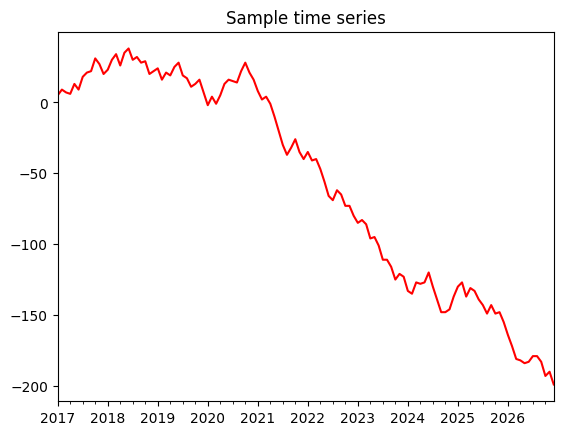

In [36]:
sampleTs.plot(c='r', title='Sample time series')

#### Aggregation Plot

<Axes: title={'center': 'Sample time series'}>

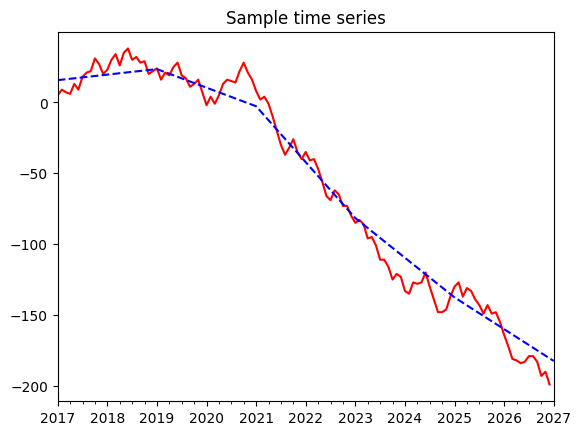

In [37]:
sampleTs.plot(c='r', title='Sample time series')
sampleTs.resample('2A').mean().plot(c='b', ls='--')

<Axes: title={'center': 'Sample time series'}>

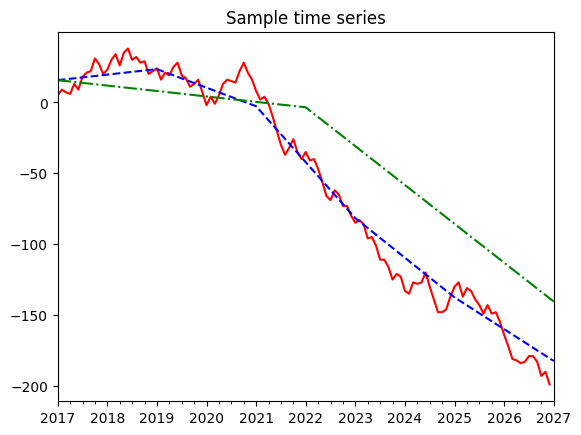

In [38]:
sampleTs.plot(c='r', title='Sample time series')
sampleTs.resample('2A').mean().plot(c='b', ls='--')
sampleTs.resample('5A').mean().plot(c='g', ls='-.')

### Lag Plot
The Lag Plot is a very important and useful visualization for Time Series Data.

Time Series is a Univariate Data.

In the lag plot, you plotted the actual data against the data with a time lag. This helps in determining how the current data is predicting the future data.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

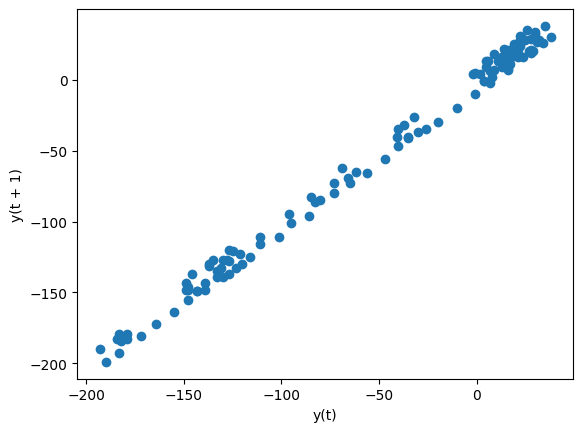

In [39]:
from pandas.plotting import lag_plot
lag_plot(sampleTs)

### Auto Correlation Plot
In the lag plot, we have just seen how the data is scattered when plotted against one-time lag.

- Autocorrelation plot goes one step further.

- Auto Correlation refers to correlating the data with itself. Here we are correlating the data with a one-time lag.

- The plot gives a more accurate picture of how the data point is correlated among themselves.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

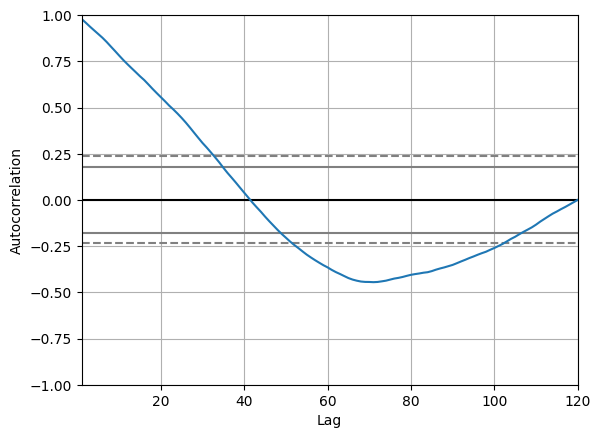

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sampleTs)

## Stationarity
Stationarity is a very significant property in Time Series Analysis. In Time series, data is collected at different time intervals. The data might behave in a deterministic or stochastic nature.

#### What is Stationarity?
- In statistical terms, the mean, variance and the temporal correlation remain constant over time.

- A simpler definition is that there are no seasonal or trend components in the time series.

#### Augmented Dickey - Fuller test
ADF test is the best way to determine if the time series data is stationary or not.

This kind of test is known as Unit Root Test.

The main objective of this test is that it identifies how the trend component determines the time series.

In [41]:
from statsmodels.tsa.stattools import adfuller
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
tsResult = adfuller(sampleTs)
print('ADF Statistic: %f' % tsResult[0])
print('p-value: %f' % tsResult[1])
for key, value in tsResult[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.655988
p-value: 0.857823
	1%: -3.487
	5%: -2.886
	10%: -2.580


*he more negative the ADF statistic value is the more likely the data is stationary.*

*The ADF Statistic should be compared to critical p-values that are at 1, 5, and 10%.*

*If the ADF statistic value is less than the critical value at 5% and the p-value is less than 0.05, then we can reject the null hypothesis that the data is non-stationary with 95% confidence level.*

## Case Study

#### The dataset we are using is dow jones index data for different stock values.

In [42]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip > data.zip

curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35074    0 35074    0     0  46493      0 --:--:-- --:--:-- --:--:-- 46455


In [43]:
!unzip data.zip 

Archive:  data.zip
  inflating: dow_jones_index.data    
  inflating: dow_jones_index.names   


In [44]:
dataFrame = pd.read_csv('/kaggle/working/dow_jones_index.data',parse_dates=["date"], index_col="date")

#### Scenario 1: Performing stationary test on WMT opening Stock prices. 

In [45]:
open_WMT_Ts = dataFrame[(dataFrame.stock == 'WMT')].open.str.replace('$',' ').astype(float)


In [46]:
open_WMT_Ts.head()

date
2011-01-07    54.23
2011-01-14    53.65
2011-01-21    55.11
2011-01-28    55.39
2011-02-04    56.45
Name: open, dtype: float64

In [47]:
tsResult1 = adfuller(open_WMT_Ts)
print('ADF Statistic: %f' % tsResult1[0])
print('p-value: %f' % tsResult1[1])
for key, value in tsResult1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.892828
p-value: 0.002088
	1%: -3.924
	5%: -3.068
	10%: -2.674


**As ADF Statistic is negative and p-value is less than 0.05, the times series is not-stationary.**

#### Scenario 2: Performing stationary test on XOM closing Stock prices. 

In [48]:
close_XOM_Ts = dataFrame[(dataFrame.stock == 'XOM')].close.str.replace('$',' ').astype(float)

In [49]:
tsResult2 = adfuller(close_XOM_Ts)
print('ADF Statistic: %f' % tsResult2[0])
print('p-value: %f' % tsResult2[1])
for key, value in tsResult2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.913251
p-value: 0.993261
	1%: -3.964
	5%: -3.085
	10%: -2.682


**As ADF Statistic is positive and p-value is more than 0.05, the times series is not-stationary.**

# Components of Time Series Data

Time Series data is not just what it is.
There are several components underlying it. They are

- Trend
- Seasonal
- Cycle
- Random

### Steps in Time Series Analysis
Few steps to be followed while performing time series analysis:

1. Check for Stationarity.
1. Decompose the model into its various components.
1. Analyse the components.
1. Fit the time series forecasting model and predict future values.

#### Seasonal Decomposition

In [50]:

from statsmodels.tsa.seasonal import seasonal_decompose
sampleTs_decomp = seasonal_decompose(sampleTs) 
sampleTs_trend = sampleTs_decomp.trend 
sampleTs_seasonal = sampleTs_decomp.seasonal 
sampleTs_residual = sampleTs_decomp.resid

#### Actual Time Series

<Axes: >

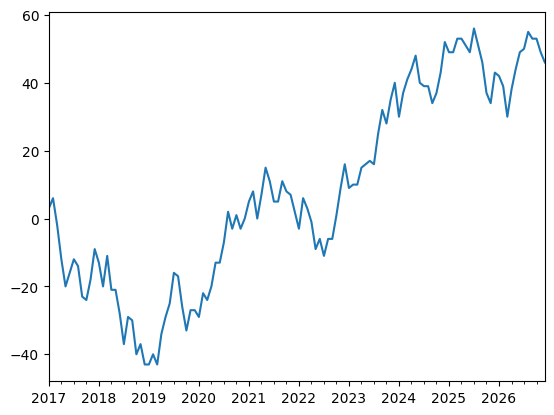

In [51]:
sampleTs.plot()

#### Visualizing the Decomposition - Trends

<Axes: >

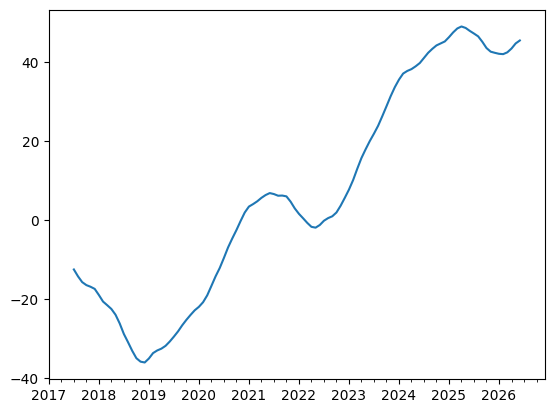

In [52]:
sampleTs_trend.plot()

#### Visualizing the Decomposition - Seasons

<Axes: >

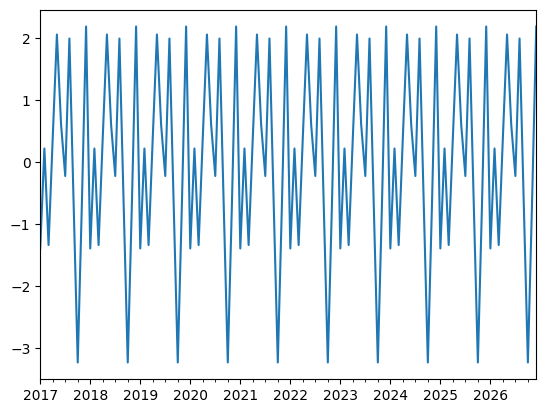

In [53]:
sampleTs_seasonal.plot()

#### Visualizing the Decomposition - Random Component

<Axes: >

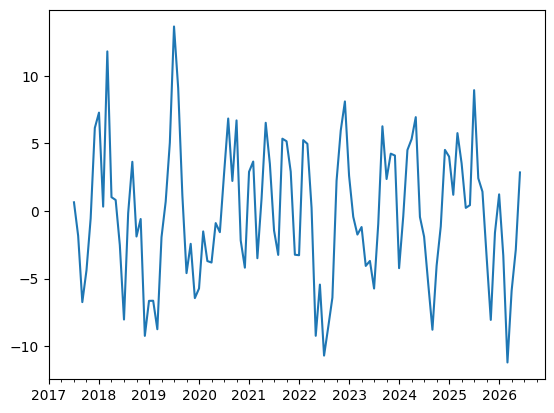

In [54]:
sampleTs_residual.plot()

## Modelling Time Series

### Autoregression

- In Autoregression, you use the current value of the variable to predict its future values.
- Here, the current and past time stamp values of the time series are used to predict the future values.

In [55]:
from statsmodels.tsa.arima.model import ARIMA 
model = ARIMA(sampleTs, order=(1, 1, 0)) 
predValues = model.fit()
predValues.params

ar.L1      0.007124
sigma2    31.754518
dtype: float64

#### Moving average
- Moving average is another way to predict the time series data.
- Here the dependent variable is expressed as a function of the previous values along with an average component.
- Average component keeps moving along the time series.



In [56]:
model = ARIMA(sampleTs, order=(0, 1, 1)) 
movingAvgRes = model.fit() 
movingAvgRes.params

ma.L1      0.009644
sigma2    31.754163
dtype: float64

#### Selecting p and q
- The **p** and **q** parameters of the Autoregressive and Moving Average models. These parameters have to be selected by how they fit the historical data.
- The AIC(Akaike Information Criterion) or BIC(Bayesian Information Criterion) have to be validated among the results and the model which has the lowest value should be chosen.

### ARIMA
- ARIMA is the combination of Autoregressive and Moving Average.
- ARIMA stands for Autoregressive Integrated Moving Average.
- It is another model used for forecasting in Time Series Analysis.

In [57]:
model = ARIMA(sampleTs, order=(1, 0, 1)) 
arimares = model.fit() 

## Auto Correlation Function
Auto Correlation is a very important step in Time Series Model Building

- *The ACF plot is a very useful graph while performing Time Series Modeling*
- *It tell the correlation value for each lag*
- *An ideal ACF plot will decay exponentially*
- *Depending on the ACF plot value , you can decide to stop at any given lag*

In [58]:
! pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.0/928.0 kB 31.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for peewee: filename=peewee-3.16.3-cp310-cp310-linux_x86_64.whl size=314460 sha256=7eb4000d675a140a53c01aa2e5085ae97f11b45c11ab8540f364274a13fa0c68
  Stored in directory: /root/.cache/pip/wheels/c8/ac/6d/ad6d828725ffbe3abc508c95d25dd0c5fcc63539ae47913790
Successfully built peewee


In [59]:
import yfinance as yf

appleData = yf.download('AAPL', start='2021-01-01', end='2022-01-01')
print(appleData.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  127.331673   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.905991   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.566811   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.817444   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.929291   

               Volume  
Date                   
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200  
2021-01-08  105158200  


The above data set has the stock prices of APPLE Inc. It is a Series of Open, High, Low , Close, Adj stock prices for a given data.
Plotting the ACF Values for various lags


[ 1.00000000e+00  9.74918713e-01  9.50034277e-01  9.23836061e-01
  8.99715541e-01  8.74602017e-01  8.52932021e-01  8.30571052e-01
  8.10207278e-01  7.91617878e-01  7.72337509e-01  7.50718711e-01
  7.22762022e-01  6.96946481e-01  6.72888593e-01  6.46661078e-01
  6.22574888e-01  5.94550211e-01  5.70470907e-01  5.49834789e-01
  5.32671835e-01  5.17405439e-01  5.02574756e-01  4.86046668e-01
  4.72552656e-01  4.60975287e-01  4.46690582e-01  4.32073969e-01
  4.17980010e-01  4.04391859e-01  3.93246205e-01  3.85235481e-01
  3.79178037e-01  3.73506947e-01  3.66941085e-01  3.61247472e-01
  3.55501671e-01  3.48522907e-01  3.40707426e-01  3.31399501e-01
  3.23772596e-01  3.16458206e-01  3.09216930e-01  3.01792947e-01
  2.92813782e-01  2.84742248e-01  2.79081382e-01  2.73029851e-01
  2.66902313e-01  2.61266801e-01  2.55766183e-01  2.50976503e-01
  2.46932309e-01  2.43340223e-01  2.40052319e-01  2.34293575e-01
  2.31168338e-01  2.28453524e-01  2.24335158e-01  2.20465315e-01
  2.15134920e-01  2.12034

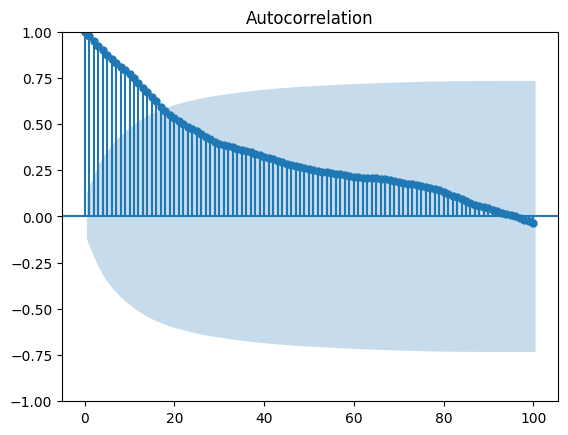

In [60]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
acf_corr = sm.tsa.acf(appleData.Close, nlags=100)
plot_acf(appleData.Close,lags=100)
print(acf_corr)
pyplot.show()

- Fitting ACF is the first step during Model Building
- Depending on the pattern you can decide what should be the order of the Auto Regression process

## Partial Auto Correlation (PACF)

- Partial Auto Correlation is another important step in the Time Series Modeling Process
- The partial auto correlation at any given lag k is the correlation obtained after cancelling the effect of correlations due to terms at shorter lags.
- In simple terms , in partial auto correlation , the effects due to intermediate terms are nullified to determine the correlation
- If you have a time series that is represented by [yt , yt-1 , yt-2 , .... yt-s]
- If you want to determine the Partial Auto Correlation between yt and yt-s then you have to nullify the effect of all intermediate terms to get the PACF value

[ 1.          0.97880285 -0.01002435 -0.04656877  0.03428863 -0.03783536
  0.06549501 -0.02722059  0.02781726  0.0395095  -0.03840433]


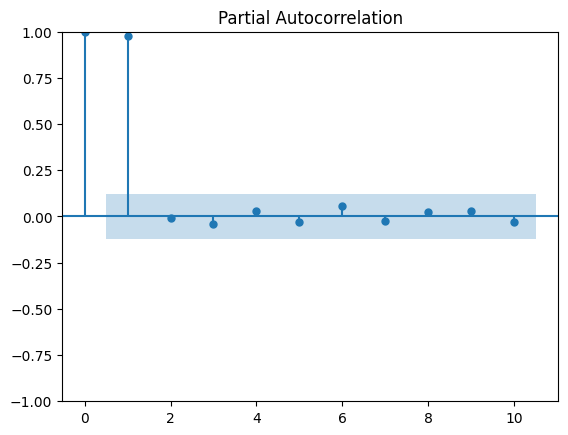

In [61]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf_corr = sm.tsa.pacf(appleData.Close, nlags=10)
plot_pacf(appleData.Close,lags=10)
print(pacf_corr)
pyplot.show()

- The PACF plot has lag on X axis and correlation value on Y axis.
- Reading the PACF Plot we will understand the number of significant lags to determine the order of AR Process.
- From the plot in the previous card , it is evident that the order of AR will be 2 for the time series.